## import 套件

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from mxnet import gluon
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
from scipy.stats import norm, skew

plt.rcParams['font.family']='DFKai-SB' #顯示中文

%matplotlib inline
# 讓圖形不會在新視窗呈現

## 加入csv檔案

In [2]:
train = pd.read_csv('Data/train.csv',skipinitialspace=True, encoding = "utf-8", dtype = {'type': np.int32}) #訓練資料
test = pd.read_csv('Data/test.csv', encoding = "utf-8") #測試資料
submission = pd.read_csv('Data/sample_submission.csv', encoding = "utf-8", dtype = {'type': np.int32}) #主辦方提供的輸出範例
train.columns
train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Data說明

SalePrice - 該物業的銷售價格以美元計算。這是您嘗試預測的目標變量。

MSSubClass：建築類

MSZoning：一般分區分類

LotFrontage：街道的線性腳連接到財產

LotArea：地塊尺寸，平方英尺

Street：道路通行的類型

Alley：通道的類型

LotShape：一般的財產形狀

LandContour：酒店的平整度

Utilities：可用的公用事業類型

LotConfig：批量配置

LandSlope：物業坡度

Neighborhood：Ames城市範圍內的物理位置

Condition1：靠近主要道路或鐵路

Condition2：靠近主要公路或鐵路（如果存在第二條）

BldgType：住宅類型

HouseStyle：住宅風格

OverallQual：整體材料和成品質量

OverallCond：總體狀況評級

YearBuilt：原始施工日期

YearRemodAdd：改造日期

RoofStyle：屋頂類型

RoofMatl：屋頂材料

Exterior1st：房屋外牆

Exterior2nd：房屋外牆（如果有多種材料）

MasVnrType：砌體貼麵類型

MasVnrArea：平方英尺的砌體飾面區域

ExterQual：外部材料質量

ExterCond：外部材料的現狀

Foundation：基礎類型

BsmtQual：地下室的高度

BsmtCond：地下室的一般情況

BsmtExposure：罷工或花園層地下室牆壁

BsmtFinType1：地下室成品區的質量

BsmtFinSF1：類型1完成平方英尺

BsmtFinType2：第二個完成區域的質量（如果存在）

BsmtFinSF2：2型成品平方英尺

BsmtUnfSF：地下室未完成的平方英尺

TotalBsmtSF：地下室總面積

Heating：加熱類型

HeatingQC：加熱質量和條件

CentralAir：中央空調

Electrical：電氣系統

1stFlrSF：一樓平方英尺

2ndFlrSF：二樓平方英尺

LowQualFinSF：低質量的平方英尺（所有樓層）

GrLivArea：以上（地面）生活區平方英尺

BsmtFullBath：地下室齊全的浴室

BsmtHalfBath：地下室半浴室

FullBath：滿級以上的浴室

HalfBath：半年級以上的洗浴

Bedroom：地下室以上的臥室數量

Kitchen：廚房數量

KitchenQual：廚房質量

TotRmsAbvGrd：以上級別的房間總數（不包括浴室）

Functional：家庭功能評級

Fireplaces：壁爐數量

FireplaceQu：壁爐質量

GarageType：車庫位置

GarageYrBlt：年車庫建成

GarageFinish：車庫的內部裝飾

GarageCars：車庫容量的車庫大小

GarageArea：車庫的面積，平方英尺

GarageQual：車庫質量

GarageCond：車庫狀況

PavedDrive：鋪好的車道

WoodDeckSF：平方英尺的木甲板面積

OpenPorchSF：平方英尺的開放式門廊區域

EnclosedPorch：封閉的門廊面積，平方英尺

3SsnPorch：三個季節的門廊面積，平方英尺

ScreenPorch：屏幕門廊面積，平方英尺

PoolArea：泳池面積，平方英尺

PoolQC：泳池質量

Fence：柵欄質量

MiscFeature：其他類別未涵蓋的其他功能

MiscVal：$雜項功能的價值

MoSold：已售出月份

YrSold：已售出年份

SaleType：銷售類型

SaleCondition：銷售條件

## 最重要的變量
1. OverallQual:整體建材和成品質量

2. YearBuilt:原始施工日期

3. TotalBsmtSF:地下室總面積

4. GrLivArea:生活區總面積

## 讀出資料

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
print("Train set size:", train.shape) #print出資料的(欄,列)
print("Test set size:", test.shape)

Train set size: (1460, 81)
Test set size: (1459, 80)


# 房價分析

## 以pandas.DataFrame.describe輸出描述性總結數據

In [5]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

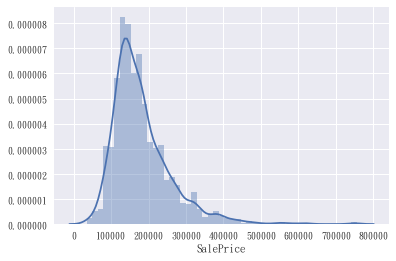

In [6]:
sns.distplot(train['SalePrice']); #繪製值方圖

In [7]:
print("Skewness: %f" % train['SalePrice'].skew()) #數據偏度
print("Kurtosis: %f" % train['SalePrice'].kurt()) #數據峰度

Skewness: 1.882876
Kurtosis: 6.536282


## 四種重要變量與房屋售價關係圖

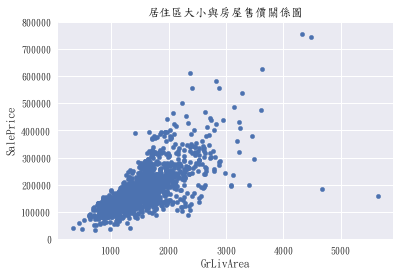

In [8]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),title='居住區大小與房屋售價關係圖');

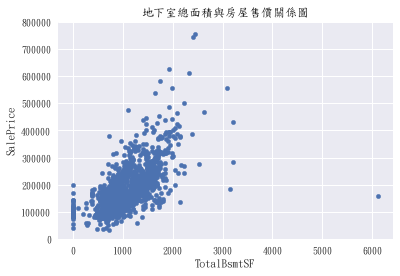

In [9]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),title='地下室總面積與房屋售價關係圖');

Text(0.5,1,'建材和成品質量與房屋售價關係圖')

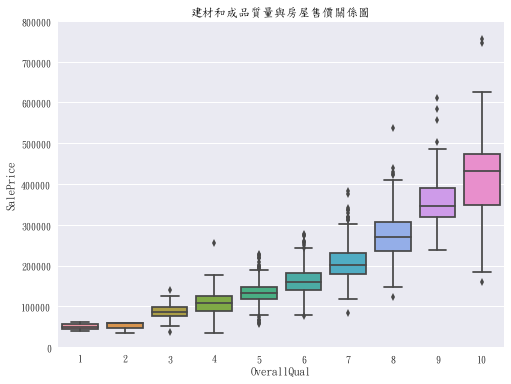

In [10]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.title('建材和成品質量與房屋售價關係圖')

Text(0.5,1,'原始施工日期與房屋售價關係圖')

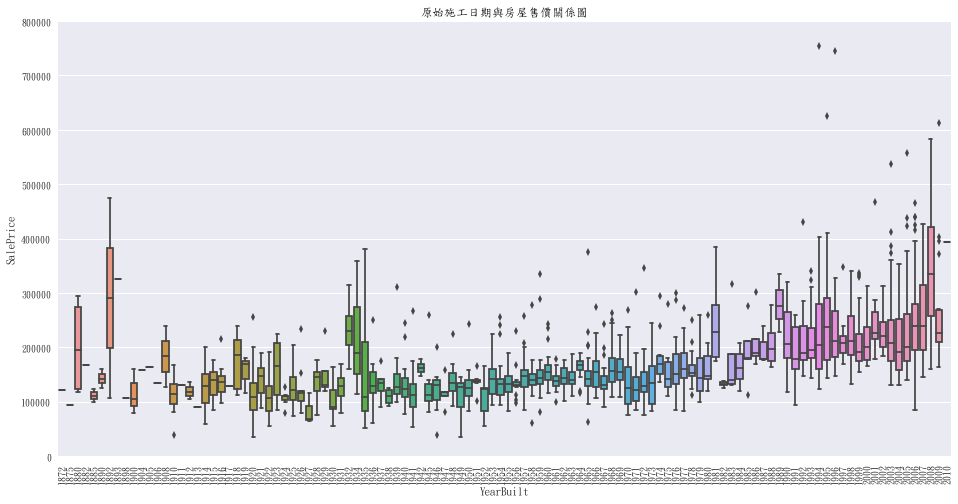

In [11]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);plt.xticks(rotation=90);
plt.title('原始施工日期與房屋售價關係圖')

### 總結
由圖可知地下室面積和生活區面積與房屋售價似乎呈現線性正相關。

從建材和成品質量與房屋售價關係圖可以看到隨着整體質量的增長，房價的增長趨勢。

## 使用Seaborn繪製資料的heatmap

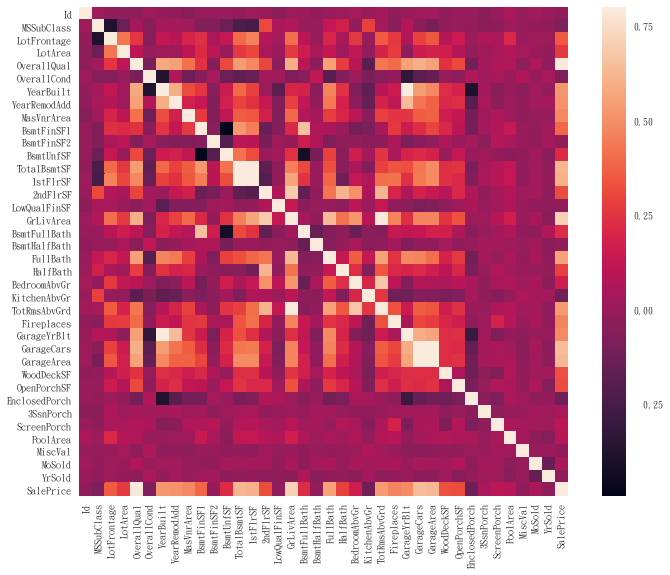

In [12]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

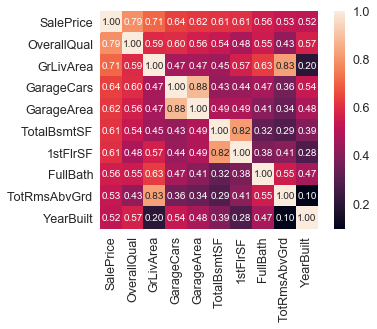

In [13]:
k = 10 #number ofvariables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
yticklabels=cols.values, xticklabels=cols.values)
plt.show()

1. OverallQual，GrLivArea 以及 TotalBsmtSF  與 SalePrice 有很強的相關性。

2. GarageCars 和 GarageArea 也是相關性比較強的變量. 車庫中存儲的車的數量是由車庫的面積決定的，它們就像雙胞胎，所以不需要專門區分 GarageCars 和 GarageAre，所以我們只需要其中的一個變量。這裡我們選擇了 GarageCars，因為它與 SalePrice 的相關性更高一些。

3. TotalBsmtSF  和 1stFloor 與上述情況相同，我們選擇 TotalBsmtS 。

4. FullBath 幾乎不需要考慮。

5. TotRmsAbvGrd 和 GrLivArea 也是變量中的雙胞胎。

6. YearBuilt 和 SalePrice 相關性似乎不強。

## 房價和相關變量之間的散點圖

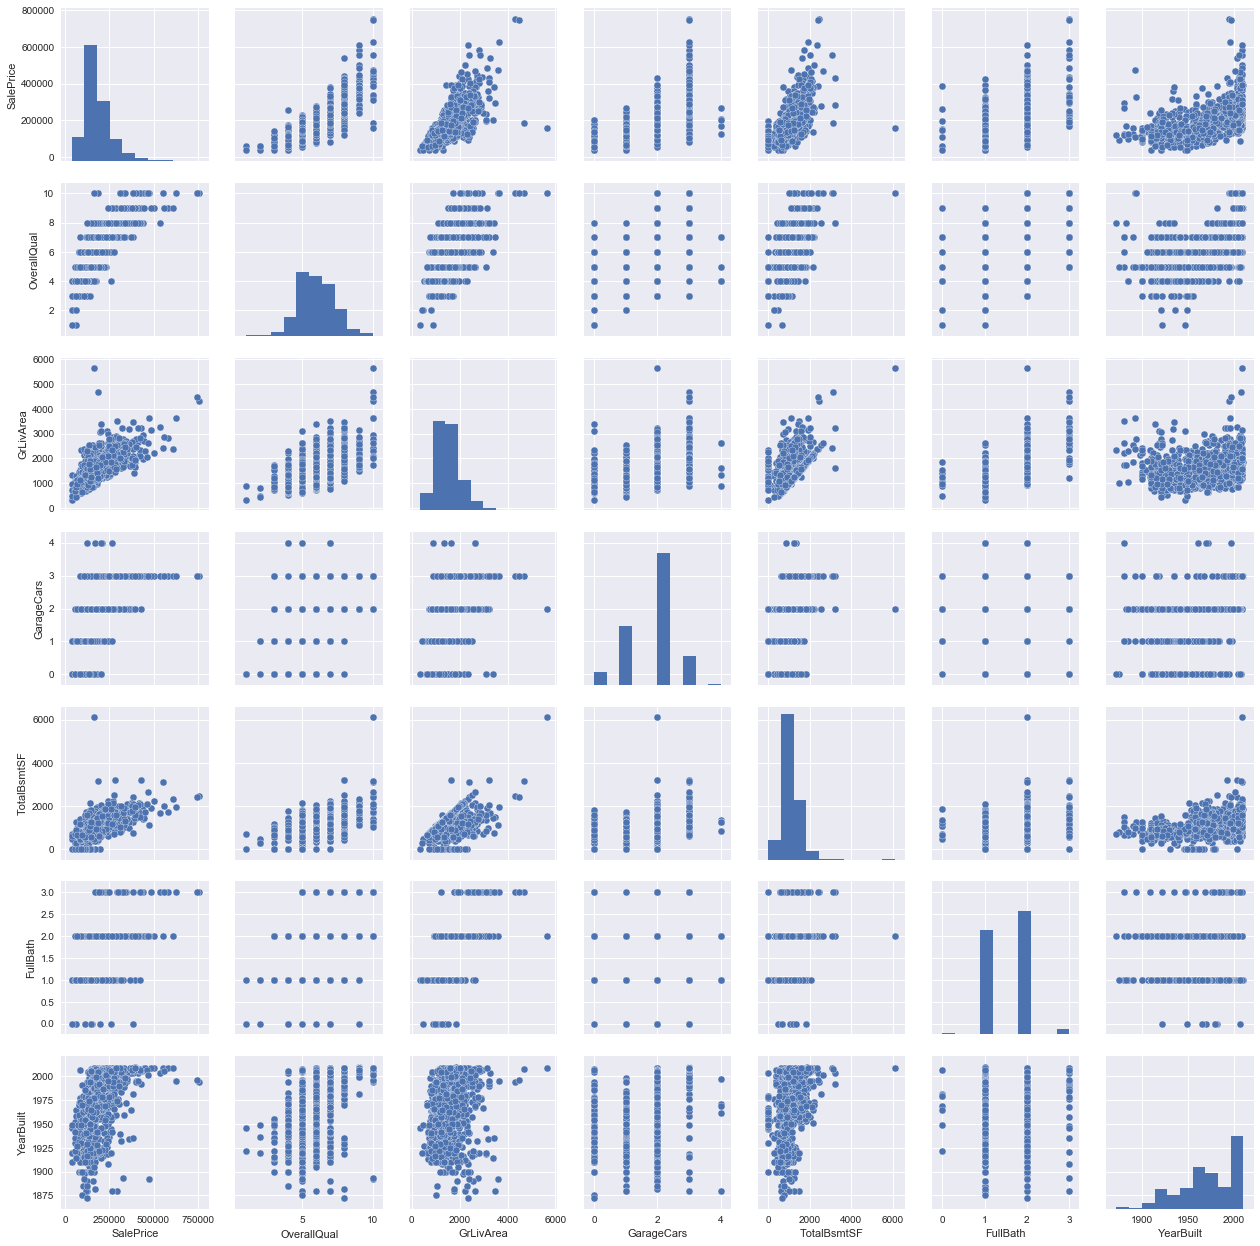

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## 查看輸出資料缺失率
大部分缺失率大於15%的資料都應該被移除

In [15]:
total= train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## 刪除缺失率太高的資料

In [16]:
drop_cols = [ "Alley","PoolQC","MiscFeature","Fence","FireplaceQu","LotFrontage"]
train=train.drop(drop_cols,axis=1)
test=test.drop(drop_cols,axis=1)
#train= train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#train= train.drop(train.loc[train['Electrical'].isnull()].index)
#train.isnull().sum().max()

## 單因素分析
這裡的關鍵在於如何建立臨界值，定義一個觀察值為異常值。我們對數據進行標準化，意味着把數據值轉換成均值為 0，方差為 1 的數據。

In [17]:
saleprice_scaled= StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of thedistribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of thedistribution:
[[ 3.82897043]
 [ 4.04098249]
 [ 4.49634819]
 [ 4.71041276]
 [ 4.73032076]
 [ 5.06214602]
 [ 5.42383959]
 [ 5.59185509]
 [ 7.10289909]
 [ 7.22881942]]


低範圍的值都比較相似並且在 0 附近分佈。

高範圍的值離 0 很遠，並且七點幾的值遠在正常範圍之外。

## 多變量分析

### GrLivArea & SalePrice

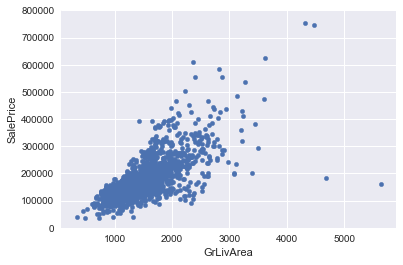

In [18]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

由上圖可知

有兩個離群的 GrLivArea 值很高的數據，我們可以推測出現這種情況的原因。或許他們代表了農業地區，也就解釋了低價。 這兩個點很明顯不能代表典型樣例，所以我們將它們定義為異常值並刪除。

圖中頂部的兩個點是七點幾的觀測值，他們雖然看起來像特殊情況，但是他們依然符合整體趨勢，所以我們將其保留下來。

### 刪除點

In [19]:
train.sort_values(by = 'GrLivArea',ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

### TotalBsmtSF & SalePrice

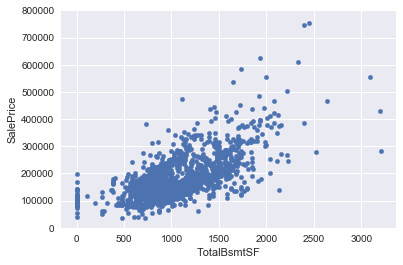

In [20]:
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

應該測量 4 個假設量：


1. 正態性

2. 同方差性

3. 線性

4. 相關錯誤缺失


正態性：

應主要關注以下兩點：

。直方圖 – 峰度和偏度。

。正態概率圖 – 數據分佈應緊密跟隨代表正態分佈的對角線。

## 對數轉換

In [21]:
features = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],test.loc[:,'MSSubClass':'SaleCondition']))
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
train["SalePrice"] = np.log1p(train["SalePrice"])

## SalePrice

可以看出，房價分佈不是正態的，顯示了峰值，正偏度，但是並不跟隨對角線。

可以用對數變換來解決這個問題

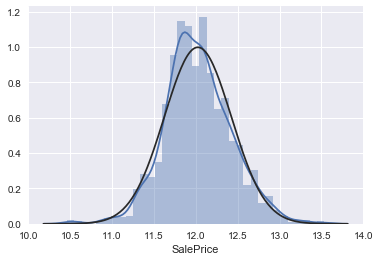

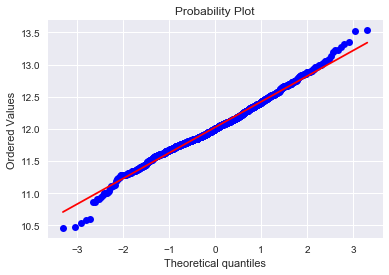

In [22]:
#繪製變換後的直方圖和正態概率圖
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

## GrLivArea

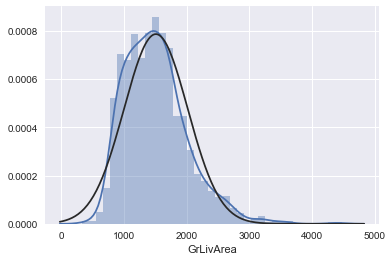

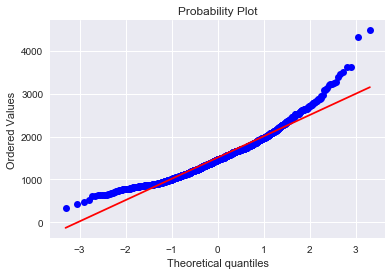

In [23]:
#繪製變換後的直方圖和正態概率圖
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

## TotalBsmtSF

從圖中可以看出：

顯示出了偏度

大量為 0 的觀察值（沒有地下室的房屋）

含 0 的數據無法進行對數變換

我們建立了一個變量，可以得到有沒有地下室的影響值（二值變量），我們選擇忽略零值，只對非零值進行對數變換。這樣我們既可以變換數據，也不會損失有沒有地下室的影響。

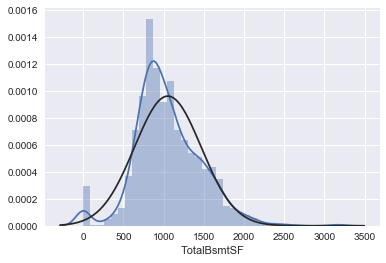

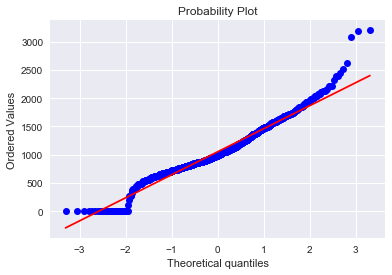

In [24]:
#繪製變換後的直方圖和正態概率圖
sns.distplot(train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

In [25]:
train['HasBsmt']= pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

## One Hot Encoding

In [26]:
numeric_feats = features.dtypes[features.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
features[skewed_feats] = np.log1p(features[skewed_feats])

features = pd.get_dummies(features)#give values to category features
features = features.fillna(features.mean())##filling NA's with the mean of the column

train_df = features[:train.shape[0]]
test_df = features[train.shape[0]:]
label_df = train.SalePrice

## 等分散性(Homoscedasticity)-最好的測量兩個變量的等分散性的方法就是圖像。



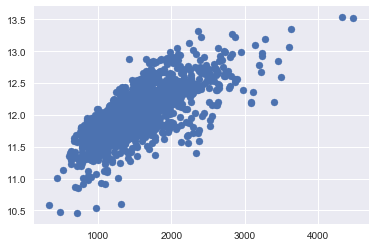

In [27]:
#SalePrice & GrLivArea的等分散性
plt.scatter(train['GrLivArea'],train['SalePrice']); #以散點圖呈現

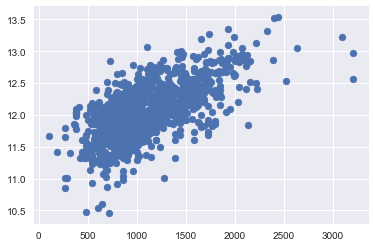

In [28]:
#SalePrice & TotalBsmtSF的等分散性
plt.scatter(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice']); #繪製散點圖

可以看出 SalePrice 在整個 TotalBsmtSF 變量範圍內顯示出了同等級別的變化。

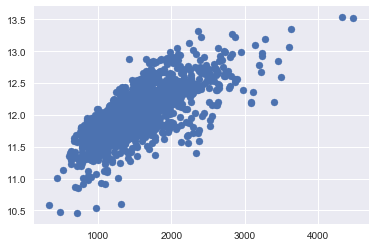

In [29]:
plt.scatter(train.GrLivArea, train.SalePrice) #房屋售價(X)和房屋佔地(Y)分布圖

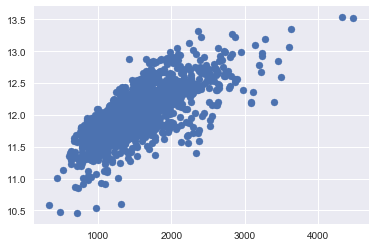

In [30]:
train = train[train.GrLivArea < 4500] #去除掉佔地大於4500坪的房屋
plt.scatter(train.GrLivArea, train.SalePrice) #再畫出分布圖

In [31]:
print(len(np.unique(train['Id'])) == len(train)) #比對資料數量是否相符
len(np.unique(test['Id'])) == len(test)

True


True

In [32]:
len(train) #查看現在資料總筆數

1458

In [33]:
#train = train.drop(['Id'], axis=1) #drop用來刪除欄或列，axis=0(刪除row);axis=1(刪除column)
#test = test.drop(['Id'], axis=1)

In [34]:
print("Train set size:", train.shape)
print("Test set size:", test.shape)

Train set size: (1458, 76)
Test set size: (1459, 74)


In [35]:
train['SalePrice'].describe()

count    1458.000000
mean       12.024015
std         0.399713
min        10.460271
25%        11.774720
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

## 使用seaborn再畫一次

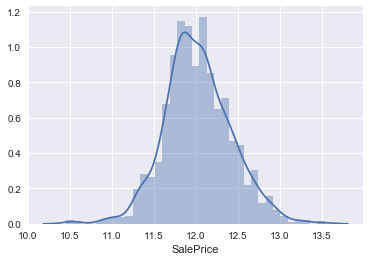

In [36]:
sns.distplot(train['SalePrice']);

## print出數據偏度和峰度度量

In [37]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121580
Kurtosis: 0.804751


In [38]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV
#reg = linear_model.RidgeCV(alphas=[5.08909,5.0891])
#reg.fit(train_df, label_df)       
#RidgeCV(alphas=[0.1,1,10], cv=None, fit_intercept=True, scoring=None,
#    normalize=False)
#print(reg.alpha_)
#exit()
reg = linear_model.Ridge (alpha = 5.08909)
reg.fit(train_df, label_df)

y_pred = reg.predict(train_df)
y_test = label_df
print("ridge score on training set: ", rmse(y_test, y_pred))#estimate
y_pred_ridge = reg.predict(test_df)

ridge score on training set:  0.0938453323986


## 用GridSearchCV跑出最適的參數調整
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV

xgbRegressor =  XGBRegressor()

parameters = {'colsample_bytree':[0.1,0.2,0.3,0.4,0.5], 'max_depth':[3,4,5], 'min_child_weight':[1,1.5,2,2.5,3],'n_estimators':[7200,7000,6300,6000],'seed':[22,32,42,52],'subsample':[0.2,0.3,0.4,0.5,0.6]}  #設定各參數範圍

CV = GridSearchCV(xgbRegressor, parameters,cv=5)

CV.fit(train_df, label_df) #尋找最佳參數

print(CV.best_params_) #輸出最佳參數

xgbRegressor =  XGBRegressor(**(gridSearchCV.best_params_)) #加入參數

xgbRegressor.fit(train_df, label_df) #訓練

In [39]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,gamma=0.0,learning_rate=0.01,max_depth=4,min_child_weight=1.5,
n_estimators=7200,reg_alpha=0.9,reg_lambda=0.6,subsample=0.2,seed=42,silent=1)

regr.fit(train_df, label_df)
y_pred = regr.predict(train_df)
y_test = label_df
print("XGBoost score on training set: ", rmse(y_test, y_pred))
y_pred_xgb = regr.predict(test_df)

XGBoost score on training set:  0.0726740369207


In [40]:
from sklearn.linear_model import Lasso
best_alpha = 0.00099# best alpha through cross-validation.
regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(train_df, label_df)

y_pred = regr.predict(train_df)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))
y_pred_lasso = regr.predict(test_df)
exit()

Lasso score on training set:  0.104018066477


In [41]:
y_pred = 0.3*y_pred_ridge + 0.4*y_pred_xgb + 0.3*y_pred_lasso
y_pred = np.exp(y_pred)

pred_df = pd.DataFrame(y_pred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('result.csv', header=True, index_label='Id')